# Práctica 4 - Filtrado de Spam usando Bayes Ingenuo

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe de la práctica. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para la P4 con el nombre NIP_P4.ipynb

Imports necesarios para ejecutar la práctica

In [ ]:
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import KFold

Carga del fichero ZIP con todos los correos

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hYha8kSpbAhGIHAfygLFmGHIzHGAK5f8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hYha8kSpbAhGIHAfygLFmGHIzHGAK5f8" -O "enron.zip" && rm -rf /tmp/cookies.txt
!unzip "enron.zip"

Lectura de los emails y carga en las estructuras de datos

In [ ]:
def read_folder(folder):
    mails = []
    file_list = glob.glob(folder)  # List mails in folder
    num_files = len(file_list)
    for i in range(0, num_files):
        i_path = file_list[i]
        i_file = open(i_path, 'rb')
        i_str = i_file.read()
        i_text = i_str.decode('utf-8', errors='ignore')  # Convert to Unicode
        mails.append(i_text)  # Append to the mail structure
        i_file.close()
    return mails

def load_enron_folders(datasets):
    path = './'
    ham = []
    spam = []
    for j in datasets:
        ham  = ham  + read_folder(path + '/enron' + str(j) + '/ham/*.txt')
        spam = spam + read_folder(path + '/enron' + str(j) + '/spam/*.txt')
    num_ham  = len(ham)
    num_spam = len(spam)
    print("mails:", num_ham+num_spam)
    print("ham  :", num_ham)
    print("spam :", num_spam)

    mails = ham + spam
    labels = [0]*num_ham + [1]*num_spam
    mails, labels = shuffle(mails, labels, random_state=0)
    return mails, labels

print("Loading files...")

print("------Loading train data--------")
mails_train, y_train = load_enron_folders([1,2,3,4])

print("------Loading validation data--------")
mails_val, y_val = load_enron_folders([5])

print("--------------Loading Test data----------------")
mails_test, y_test = load_enron_folders([6])

Loading files...
------Loading train data--------
mails: 22541
ham  : 13545
spam : 8996
------Loading validation data--------
mails: 5175
ham  : 1500
spam : 3675
--------------Loading Test data----------------
mails: 6000
ham  : 1500
spam : 4500


Código para generar una bolsa de palabras que cuenta el número de apariciones de cada palabra en la lista de correos

Crea una matriz X con tantas filas como correos (27716) y tantas columnas como palabras de la BD. El elemento (i,j) de la matriz contiene el número de ocurrencias de la palabra j en el correo i

In [ ]:
vectorizer  = CountVectorizer(ngram_range=(1, 1))  # Instancia de bolsa de palabras con palabras individuales como características
X_train = vectorizer.fit_transform(mails_train)                # Generación y cálculo de la bolsa de palabras en base a los datos de entrenamiento
X_val = vectorizer.transform(mails_val)        # Cáclulo de la bolsa de palabras con los datos de validación
X_test = vectorizer.transform(mails_test)          # Cáclulo de la bolsa de palabras con los datos de test

Aprendizaje de las probabilidades utilizando un modelo de distribución Bernoulli.

Consulta la documentación de sklearn para entender los parámetros.

In [ ]:
classifier = BernoulliNB(alpha=0.01, fit_prior=True, class_prior=None) # Instancia de clasificador de Bayes Ingenuo con distribución de Bernoulli
classifier.fit(X_train,y_train) # Cálculo de las probabilidades asociadas a cada palabra de la bolsa
classifier1 = MultinomialNB(alpha=0.01, fit_prior=True, class_prior=None) # Instancia de clasificador de Bayes Ingenuo con distribución de Multinomial
classifier1.fit(X_train,y_train) # Cálculo de las probabilidades asociadas a cada palabra de la bolsa

MultinomialNB(alpha=0.01)

Cálculo de métricas del clasificador de Bernoulli y de Multinomial utilizando los datos de validación. Comparación de ambos:

In [ ]:
y_pred = classifier.predict(X_val)
f1_score = metrics.f1_score(y_val, y_pred)
print('%s %2.2f%s' % ('F1-score of the test of Bernoulli: ', 100*f1_score, '%' ))


F1-score of the test of Bernoulli:  98.52%


In [ ]:
y_pred = classifier1.predict(X_val)
f1_score = metrics.f1_score(y_val, y_pred)
print('%s %2.2f%s' % ('F1-score of the test of Multinomial: ', 100*f1_score, '%' ))


F1-score of the test of Multinomial:  99.18%


Tras varias pruebas, se concluye que el mejor valor de alfa es 0,01 ya que
cuanto más pequeño, menos hace falta suavizar el hiper parámetro y por tanto,más eficiente es el algoritmo. El clasificador que se ha elegido ha sido el de Multinomial, al obtener un valor de f1_score mayor que el de Bernoulli.

Cálculo de métricas del clasificador de Multinomial utilizando los datos de test

1. Interpreta los resultados obtenidos para tu clasificador, ¿consideras que es un buen
clasificador de correo SPAM?

Considero que es un buen clasificador ya que, tras hacer el test, he obtenido un resultado del 98% de correos identificados como SPAM del 100% de SPAM total.

In [ ]:
y_pred1 = classifier1.predict(X_test)
f1_scoreM = metrics.f1_score(y_test, y_pred1)
print('%s %2.2f%s' % ('F1-score of the test of Multinomial: ', 100*f1_scoreM, '%' ))


F1-score of the test of Multinomial:  98.90%


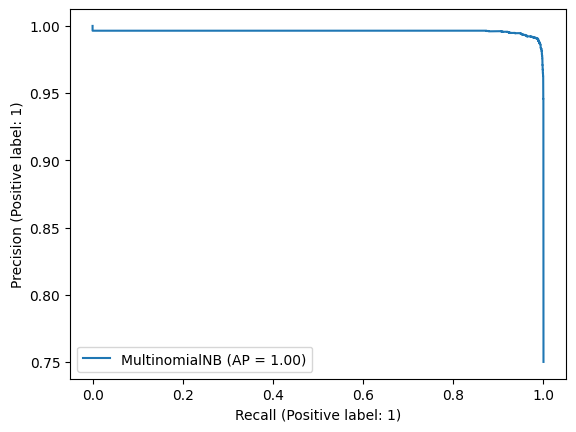

In [ ]:
metrics.PrecisionRecallDisplay.from_estimator(classifier1,X_test, y_test)

Un AP (Average Precision) de 1.00 sugiere que el modelo Multinomial Naive Bayes ha tenido un rendimiento perfecto en la tarea de clasificación.

2. Selecciona un umbral adecuado para el clasificador de spam en base a la curva
precisión-recall, justificando la respuesta.

In [ ]:
M=metrics.confusion_matrix(y_test, y_pred1)
print("Confusion Matrix Multinomial:")
print(M)


Confusion Matrix Multinomial:
[[1450   50]
 [  49 4451]]


Con el umbral por defecto (50%), se obtienen 50 falsos negativos y 49 falsos positivos.

In [ ]:
y_pred = classifier.predict_proba(X_test)
pred = []
for i in range(len(y_pred)):
  if y_pred[i][1] > 0.075:
    pred.append(1)
  else:
    pred.append(0)
f1_score=metrics.f1_score(y_test, pred)
print('%s %2.2f%s' % ('F1-score of the test: ', 100*f1_score, '%' ))
C=metrics.confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(C)
acc=metrics.accuracy_score(y_test, pred)
precision=metrics.precision_score(y_test, pred)
recall=metrics.recall_score(y_test, pred)
print('%s %2.8f' % ('Accuracy: ', acc))
print('%s %2.8f' % ('Precision: ', precision))
print('%s %2.8f' % ('Recall: ', recall))


F1-score of the test:  98.64%
Confusion Matrix:
[[1418   82]
 [  41 4459]]
Accuracy:  0.97950000
Precision:  0.98194230
Recall:  0.99088889


Tras varias pruebas, se ha seleccionado el umbral del 7,5% ya que se obtienen los porcentajes más bajos de falsos valores: 82 falsos negativos y 41 falsos positivos.

La métrica de precisión es de 98%, recall de 99% y accuracy, 97%, que es el porcentaje de correos correctamente clasificados respecto al total.


3. Selecciona de entre los correos electrónicos de test algunos ejemplos de spam y
ham clasificados correcta e incorrectamente, y discute los resultados.



In [50]:
for i in range(len(mails_test)):
  if y_test[i] == 1 and pred[i] == 1:
    vp, vp_i = mails_test[i], i
    break
for i in range(len(mails_test)):
  if y_test[i] == 0 and pred[i] == 0:
    vn, vn_i = mails_test[i], i
    break
for i in range(len(mails_test)):
  if y_test[i] == 0 and pred[i] == 1:
    fp, fp_i = mails_test[i], i
    break
for i in range(len(mails_test)):
  if y_test[i] == 1 and pred[i] == 0:
    fn, fn_i = mails_test[i], i
    break


print("Ejemplo de verdadero positivo (spam)- encontrado en la componente %d:\n\n%s" % (vp_i, vp))
print("Ejemplo de verdadero negativo (ham)- encontrado en la componente %d:\n\n%s" % (vn_i, vn))
print("Ejemplo de falso positivo (ham) - encontrado en la componente %d:\n\n%s\n" % (fp_i, fp))
print("Ejemplo de falso negativo (spam) - encontrado en la componente %d:\n\n%s" % (fn_i, fn))

Ejemplo de verdadero positivo (spam)- encontrado en la componente 0:

Subject: need your vics ?
brand name meds such as vics , vals , xanies and others
why not check it out ?

Ejemplo de verdadero negativo (ham)- encontrado en la componente 3:

Subject: bullets 11 / 3
new mexico train de - railment - most of this week was spent helping customers
re - route gas as the train derailment on tw ' s right - of - way in mckinley county ,
new mexico forced operations to blow down the mainline in the east of thoreau
area . the accident reduced flow to the california border by 250 , 000 mmbtu / d
or 25 % . once the 27 rail cars were removed , a determination was made that
line would need to be hydro - tested to ensure no damage had occurred .
approximately 2000 feet of pipe was excavated , the coating inspected and / or
replaced , and if test results are good , the line should be back in service
sometime during the weekend of november 3 . while the pipe is being recoated ,
the line segment will 

Comparativa de clasificadores con la utilización de bi-gramas

In [ ]:
vectorizer  = CountVectorizer(ngram_range=(1, 2))  # Instancia de bolsa de palabras con palabras individuales como características, ahora con bi-gramas (1,2)
X_train = vectorizer.fit_transform(mails_train)    # Generación y cálculo de la bolsa de palabras en base a los datos de entrenamiento
X_val = vectorizer.transform(mails_val)        # Cáclulo de la bolsa de palabras con los datos de validación
X_test = vectorizer.transform(mails_test)          # Cáclulo de la bolsa de palabras con los datos de test

In [ ]:
classifier = BernoulliNB(alpha=0.01, fit_prior=True, class_prior=None) # Instancia de clasificador de Bayes Ingenuo con distribución de Bernoulli
classifier.fit(X_train,y_train) # Cálculo de las probabilidades asociadas a cada palabra de la bolsa
classifier1 = MultinomialNB(alpha=0.01, fit_prior=True, class_prior=None) # Instancia de clasificador de Bayes Ingenuo con distribución de Multinomial
classifier1.fit(X_train,y_train) # Cálculo de las probabilidades asociadas a cada palabra de la bolsa

MultinomialNB(alpha=0.015)

Cálculo de métricas del clasificador de Bernoulli y de Multinomial utilizando los datos de validación. Comparación de ambos:

In [ ]:
y_pred = classifier1.predict(X_val)
f1_score = metrics.f1_score(y_val, y_pred)
print('%s %2.2f%s' % ('F1-score of the test of Multinomial: ', 100*f1_score, '%' ))

F1-score of the test of Multinomial:  99.55%


In [ ]:
y_pred = classifier.predict(X_val)
f1_score = metrics.f1_score(y_val, y_pred)
print('%s %2.2f%s' % ('F1-score of the test of Bernoulli: ', 100*f1_score, '%' ))


F1-score of the test of Bernoulli:  98.20%


Las bolsas de palabras sin característica de bi-grama resultan en un 98.52% con Bernoulli y un 98.90% con Multinomial en el test de datos de validación. En cambio, si establecemos bi-gramas con el mismo alpha de 0.01, se obtiene un 98.20% en Bernoulli y un 99.55% en Multinomial.

Por consiguiente, se concluye que hay una notable mejora con el uso de bi-gramas para el algoritmo Multinomial y un ligero empeoramiento para el algoritmo de Bernoulli.